**비지도 학습**

사용할 수 있는 데이터는 대부분 레이블이 없음
- 모든 사진에 레이블을 붙일 필요 없이 알고리즘이 레이블이 없는 데이터를 바로 사용하자 -> 비지도 학습

---
**알고리즘**
1. **군집(clustering)**
- 비슷한 클러스터로 모음
- 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용 가능
2. **이상치 탐지(outlier detection)**
- '정상' 데이터가 어떻게 보이는지 학습함
- 비정상 샘플을 감지하는 데 사용함
3. **밀도 추정(density estimation)**
- 데이터셋 생성 확률 과정의 **확률 밀도 함수(PDF)**를 추정함
- 밀도 추정은 이상치 탐지에 널리 사용됨
- 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높음

# 군집

**군집** : 비슷해 보이는 것들을 모음

**클러스터** : 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당함

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

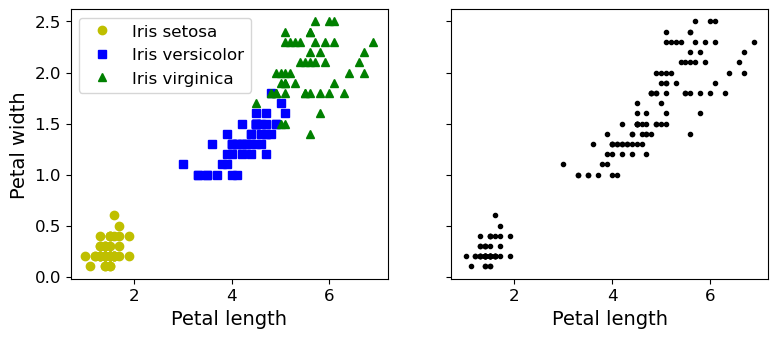

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

# save_fig("classification_vs_clustering_plot")
plt.show()

- 왼쪽은 붓꽃 데이터셋임
    - 각 샘플의 품종이 구분되어 나타나 있음
    - 레이블이 되어 있음
    - 로지스틱 회귀, SVM, 랜덤 포레스트 분류기가 분류 알고리즘에 ㅜ잘 맞음
- 오른쪽은 동일한 데이터지만 레이블이 없음
    - 분류 알고리즘 사용 불가
    - 군집 알고리즘 필요

---
- 특성을 사용하면 군집 알고리즘이 클러스터 세 개를 매우 잘 구분할 수 있을 것임

---
**군집 알고리즘을 사용하는 경우**
1. 고객 분류
- 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있음
- 고객이 누구인지 고객이 무엇을 원하는지 이해하는 데 도움이 됨
- 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음
- 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 **추천 시스템**을 만들 수 있음
2. 데이터 분석
- 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됨
3. 차원 축소 기법
- 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 **친화성**을 측정할 수 있음
- k개의 클러스터가 있으면 k차원이 됨
4. 이상치 탐지
- 친화성이 낮은 샘플은 이상치일 가능성이 높음
- **부정 거래 감지**에 활용됨
5. 준지도 학습
- 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있음
- 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상함
6. 검색 엔진
- 제시된 이미지와 비슷한 이미지를 찾아줌
7. 이미지 분할
- 색을 기반으로 픽셀을 클러스터로 모음
- 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿈
- 이미지에 있는 색상의 종류를 크게 줄임

클러스터에 대한 보편적인 정의는 없고 상황에 따라 다름
- 어떤 알고리즘은 **센트로이드**라 부르는 특정 포인트를 중심으로 모인 샘플을 찾음
- 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾음
- 어떤 알고리즘은 계층적으로 클러스터의 클러스터를 찾음